# Implementing models with Keras

### Data augmentation

In [1]:
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

## Loading data

In [1]:
# lets count data
import os
from tensorflow import keras

train_data = 'Datasets/Propio/lbp_dataset/train_data'
test_data = 'Datasets/Propio/lbp_dataset/test_data'
validation_data = 'Datasets/Propio/lbp_dataset/validation_data'

train_ds = keras.preprocessing.image


In [7]:
from keras.preprocessing.image import ImageDataGenerator
im_width, im_height = 32, 32
nb_train_samples = 8144
epochs = 100
batch_size = 200
n_classes = 7

datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    rotation_range=5,
    horizontal_flip=True
)
train_gen = datagen.flow_from_directory(train_data, target_size=(im_width, im_height), class_mode='categorical', batch_size=batch_size)
validation_gen = datagen.flow_from_directory(validation_data, target_size=(im_width, im_height), class_mode='categorical', batch_size=batch_size)


Found 5749 images belonging to 7 classes.
Found 1515 images belonging to 7 classes.


In [9]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1, min_delta=1e-4)
callbacks_list = [early_stop, reduce_lr]
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])


In [10]:
model_history = model.fit_generator(
    train_gen,
    epochs=epochs,
    validation_data=validation_gen,
    steps_per_epoch=train_gen.samples//batch_size,
    callbacks=callbacks_list,
    validation_steps=250

)

Epoch 1/100
28/28 [==============================] - 122s 4s/step - loss: 1.3253 - acc: 0.4798 - val_loss: 29.0518 - val_acc: 0.1271
Epoch 2/100
28/28 [==============================] - 104s 4s/step - loss: 1.3118 - acc: 0.4837 - val_loss: 48.7205 - val_acc: 0.1090
Epoch 3/100
28/28 [==============================] - 94s 3s/step - loss: 1.3074 - acc: 0.4833 - val_loss: 35.9805 - val_acc: 0.3398
Epoch 4/100
28/28 [==============================] - 95s 3s/step - loss: 1.2844 - acc: 0.4907 - val_loss: 48.1772 - val_acc: 0.1092
Epoch 5/100
28/28 [==============================] - 91s 3s/step - loss: 1.2812 - acc: 0.4981 - val_loss: 33.7747 - val_acc: 0.1090

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 6/100
28/28 [==============================] - 85s 3s/step - loss: 1.2616 - acc: 0.5084 - val_loss: 17.2014 - val_acc: 0.1104
Epoch 7/100
28/28 [==============================] - 86s 3s/step - loss: 1.2445 - acc: 0.5071 - val_loss: 11.2485 - val_acc:

In [14]:
model_history.history

{'val_loss': [158.7906317068453,
  160.18434777578872,
  275.6792598115723,
  274.6381919980951,
  269.2915709123372,
  160.24959367526287,
  112.29381665568478,
  83.27459404622284,
  65.59727396634432,
  51.01763233054309],
 'val_acc': [0.1429003937406194,
  0.14305177134499203,
  0.1429003936797155,
  0.14274901616105953,
  0.14259763865593778,
  0.1427490161847444,
  0.14259763864014785,
  0.14259763862999722,
  0.1430517712660425,
  0.14290039374964222],
 'loss': [2.1840989117575162,
  1.9860413723652905,
  1.8665387772097446,
  1.7005741926703122,
  1.613238005354853,
  1.5987281964557005,
  1.680512536870371,
  1.5910642477545407,
  1.5756910933126318,
  1.4917336914799002],
 'acc': [0.148514851780221,
  0.18811881202872438,
  0.3168316837584618,
  0.3663366348436563,
  0.34653465361288277,
  0.42574257455249825,
  0.3168316833158531,
  0.3861386141564586,
  0.42574257425742573,
  0.4158415843059521],
 'lr': [0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.000100000005,
  0.00010

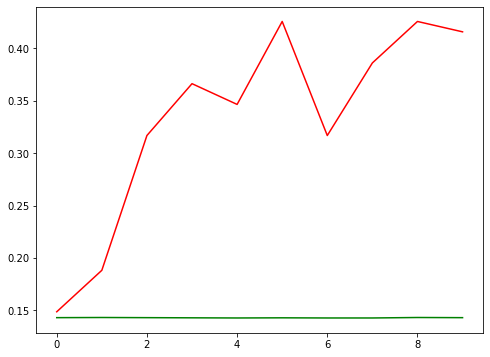

In [15]:
from matplotlib import pyplot as plt
import numpy as np
plt.figure(0)
plt.plot(model_history.history['acc'], 'r')
plt.plot(model_history.history['val_acc'], 'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train', 'validation'])

plt.figure(1)
plt.plot(model_history.history['loss'], 'r')
plt.plot(model_history.history['val_loss'], 'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train', 'validation'])

In [ ]:
AlexNet.evaluate_generator(validation_gen, steps=None, max_queue_size=10, workers=1, use_multiprocessing=True)

In [ ]:
pred = AlexNet.predict_generator(validation_gen, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)
predicted = np.argmax(pred, axis=1)

In [1]:
import os
from utils.ReID import extract_masks, apply_mask, dpm, lbp

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


In [1]:
from utils.ReID import calc_lbph, dpm, apply_mask, crop_frame, lbp
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from utils.MaskRCNN import MaskRCNN
from utils.ReID import *
from utils.LocalBinaryPatterns import LocalBinaryPatterns

model = MaskRCNN()
lbp_2 = LocalBinaryPatterns(16, 1)

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


In [2]:
def data_augmentation(parent_root):
    aug_generator = ImageDataGenerator(rotation_range=10, width_shift_range=0.2, height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True, brightness_range=[0.4, 1.5])
    for person in os.listdir(parent_root):

        person_root = os.path.join(parent_root, person)

        print("Working on: ", person_root)
        counter = 0
        for instance in os.listdir(person_root):
            if instance.endswith('jpg') is False:
                continue

            augmented_imgs_path = os.path.join(person_root, 'augmented')
            if os.path.exists(augmented_imgs_path) is False:
                print("creating ", augmented_imgs_path)
                os.mkdir(augmented_imgs_path)
            name = 'person_{}_{}.jpg'.format(person, counter)
            print('Processing {} ...'.format(name))
            source_path = os.path.join(person_root, instance)
            image = cv2.imread(source_path)
            name = 'person_{}_{}.jpg'.format(person, counter)
            result_name = os.path.join(augmented_imgs_path, name)
            print('Saving {} original element'.format(result_name))
            cv2.imwrite(result_name, image)

            image = np.expand_dims(image, 0)
            aug_iter = aug_generator.flow(image)
            aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(20)]

            for k in range(len(aug_images)):
                counter += 1

                name = 'person_{}_{}.jpg'.format(person, counter)
                result_name = os.path.join(augmented_imgs_path, name)
                print('Saving {} element'.format(result_name))
                cv2.imwrite(result_name, aug_images[k])



In [3]:
import csv
def write_csv(path, header, data):
    with open(path, 'w', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(header)
        writer.writerows(data)

In [4]:
from pathlib import Path
import pandas as pd



def generate_dataset(parent_root, target_root, csv_path):
    header = ['area', 'perimeter', 'class']

    data = []
    for person in os.listdir(parent_root):

        person_root = os.path.join(parent_root, person)
        target_person_root = os.path.join(target_root, person)
        print("Working on: ", person_root)
        counter = 0
        for instance in os.listdir(person_root):
            if instance.endswith('jpg') is False:
                break
            if instance == 'processed':
                continue
            counter += 1
            name = 'person_{}_{}.jpg'.format(person, counter)
            print('Processing {} ...'.format(name))
            source_path = os.path.join(person_root, instance)
            processed_imgs_path = os.path.join(person_root, 'processed')


            print("Opening ", source_path)
            image = cv2.imread(source_path)
            if os.path.exists(source_path) is False:
                break
            image_cp = image.copy()
            r, _ = model.segment(image)

            if len(r['masks']) != 0 and len(r['rois']) != 0:
                for i in range(len(r["rois"])):
                    mask = r["masks"][:, :, i].astype('uint8')
                    mask_cp = mask.copy()
                    area, perimeter = mask_area_perimeter(mask_cp)
                    class_id = person
                    data.append([area, perimeter, class_id])
                    masked_image = apply_mask(image_cp, mask)
                    x1, y1 = r["rois"][i][0], r["rois"][i][1]
                    x2, y2 = r["rois"][i][2], r["rois"][i][3]
                    cropped_frame = crop_frame(x1, x2, y1, y2, masked_image)

                    # calculating person features

                    hist = lbp_2.describe(cropped_frame)
                    cropped_frame = lbp_2.lbp(cropped_frame)

                    cropped_frame = cv2.cvtColor(cropped_frame.astype('uint8') * 255, cv2.COLOR_GRAY2RGB)

                    result_name = os.path.join(target_person_root, name)

                    # saving data
                    print("Saving on: {}".format(result_name))
                    cv2.imwrite(result_name, cropped_frame)

    write_csv(csv_path, header, data)

In [16]:
parent_root = 'Datasets/Propio/primer_grupo/validation_data/'
data_augmentation(parent_root)

Working on:  Datasets/Propio/primer_grupo/validation_data/1
Processing person_1_0.jpg ...
Saving Datasets/Propio/primer_grupo/validation_data/1\augmented\person_1_0.jpg original element
Saving Datasets/Propio/primer_grupo/validation_data/1\augmented\person_1_1.jpg element
Saving Datasets/Propio/primer_grupo/validation_data/1\augmented\person_1_2.jpg element
Saving Datasets/Propio/primer_grupo/validation_data/1\augmented\person_1_3.jpg element
Saving Datasets/Propio/primer_grupo/validation_data/1\augmented\person_1_4.jpg element
Saving Datasets/Propio/primer_grupo/validation_data/1\augmented\person_1_5.jpg element
Saving Datasets/Propio/primer_grupo/validation_data/1\augmented\person_1_6.jpg element
Saving Datasets/Propio/primer_grupo/validation_data/1\augmented\person_1_7.jpg element
Saving Datasets/Propio/primer_grupo/validation_data/1\augmented\person_1_8.jpg element
Saving Datasets/Propio/primer_grupo/validation_data/1\augmented\person_1_9.jpg element
Saving Datasets/Propio/primer_g

In [2]:
parent_root = 'Datasets/espe/base/test'
target_root = 'Datasets/espe/masked/test'
csv_path = 'Datasets/espe/lbp_histograms/test/test.csv'

from processing import generate_masked_dataset

generate_masked_dataset(parent_root, target_root, csv_path)

Working on:  Datasets/espe/base/test\1
Processing person_1_1.jpg ...
Opening  Datasets/espe/base/test\1\001_9 16.jpg
Saving file on Datasets/espe/masked/test\1\person_1_1.jpg
Processing person_1_2.jpg ...
Opening  Datasets/espe/base/test\1\001_9 17.jpg
Saving file on Datasets/espe/masked/test\1\person_1_2.jpg
Processing person_1_3.jpg ...
Opening  Datasets/espe/base/test\1\001_9 19.jpg
Saving file on Datasets/espe/masked/test\1\person_1_3.jpg
Processing person_1_4.jpg ...
Opening  Datasets/espe/base/test\1\001_9 21.jpg
Saving file on Datasets/espe/masked/test\1\person_1_4.jpg
Processing person_1_5.jpg ...
Opening  Datasets/espe/base/test\1\001_9 22.jpg
Saving file on Datasets/espe/masked/test\1\person_1_5.jpg
Processing person_1_6.jpg ...
Opening  Datasets/espe/base/test\1\001_9 23.jpg
Saving file on Datasets/espe/masked/test\1\person_1_6.jpg
Processing person_1_7.jpg ...
Opening  Datasets/espe/base/test\1\001_9 24.jpg
Saving file on Datasets/espe/masked/test\1\person_1_7.jpg
Processin

In [1]:
parent_root = 'Datasets/Propio/primer_grupo/test_data'
target_root = 'Datasets/espe/lbp_histograms - copia/test'
csv_path = 'Datasets/espe/lbp_histograms - copia/test/test.csv' # areas and perimeters csv dataset path

# generate_dataset(parent_root, target_root, csv_path)
from processing import generate_dataset_with_lbp

generate_dataset_with_lbp(parent_root, target_root, csv_path)


Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead
Working on:  Datasets/Propio/primer_grupo/test_data\0
Processing person_0_1.jpg ...
Opening  Datasets/Propio/primer_grupo/test_data\0\person_1_0.jpg
Saving file on Datasets/espe/lbp_histograms - copia/test\0\person_0_1.jpg
Processing person_0_2.jpg ...
Opening  Datasets/Propio/primer_grupo/test_data\0\person_1_1.jpg
Saving file on Datasets/espe/lbp_histograms - copia/test\0\person_0_2.jpg
Processing person_0_3.jpg ...
Opening  Datasets/Propio/primer_grupo/test_data\0\person_1_10.jpg
Saving file on Datasets/espe/lbp_histograms - copia/test\0\person_0_3.jpg
Processing person_0_4.jpg ...
Opening  Datasets/Propio/primer_grupo/test_data\0\person_1_100.jpg
Saving file on Datasets/espe/lbp_histograms - copia/test\0\person_0_4.jpg
Processing person_

In [2]:
parent_root = 'Datasets/Propio/primer_grupo/validation_data'
target_root = 'Datasets/espe/lbp_histograms/validation'
csv_path = 'Datasets/espe/lbp_histograms/validation/validation.csv' # areas and perimeters csv dataset path

# generate_dataset(parent_root, target_root, csv_path)
from processing import generate_dataset_with_lbp

generate_dataset_with_lbp(parent_root, target_root, csv_path)

Working on:  Datasets/Propio/primer_grupo/validation_data\0
Processing person_0_1.jpg ...
Opening  Datasets/Propio/primer_grupo/validation_data\0\person_1_0.jpg
Saving file on Datasets/espe/lbp_histograms/validation\0\person_0_1.jpg
Processing person_0_2.jpg ...
Opening  Datasets/Propio/primer_grupo/validation_data\0\person_1_1.jpg
Saving file on Datasets/espe/lbp_histograms/validation\0\person_0_2.jpg
Processing person_0_3.jpg ...
Opening  Datasets/Propio/primer_grupo/validation_data\0\person_1_10.jpg
Saving file on Datasets/espe/lbp_histograms/validation\0\person_0_3.jpg
Processing person_0_4.jpg ...
Opening  Datasets/Propio/primer_grupo/validation_data\0\person_1_100.jpg
Saving file on Datasets/espe/lbp_histograms/validation\0\person_0_4.jpg
Processing person_0_5.jpg ...
Opening  Datasets/Propio/primer_grupo/validation_data\0\person_1_101.jpg
Saving file on Datasets/espe/lbp_histograms/validation\0\person_0_5.jpg
Processing person_0_6.jpg ...
Opening  Datasets/Propio/primer_grupo/va

In [3]:
parent_root = 'Datasets/espe/base/validation'
target_root = 'Datasets/espe/lbp_histograms - copia/validation'
csv_path = 'Datasets/espe/lbp_histograms - copia/validation/validation.csv' # areas and perimeters csv dataset path
from processing import generate_dataset_with_lbp
generate_dataset_with_lbp(parent_root, target_root, csv_path)

Working on:  Datasets/espe/base/validation\0
Processing person_0_1.jpg ...
Opening  Datasets/espe/base/validation\0\001_9 14.jpg
Saving file on Datasets/espe/lbp_histograms - copia/validation\0\person_0_1.jpg
Processing person_0_2.jpg ...
Opening  Datasets/espe/base/validation\0\001_9 15.jpg
Saving file on Datasets/espe/lbp_histograms - copia/validation\0\person_0_2.jpg
Processing person_0_3.jpg ...
Opening  Datasets/espe/base/validation\0\001_9 18.jpg
Saving file on Datasets/espe/lbp_histograms - copia/validation\0\person_0_3.jpg
Processing person_0_4.jpg ...
Opening  Datasets/espe/base/validation\0\001_9 20.jpg
Saving file on Datasets/espe/lbp_histograms - copia/validation\0\person_0_4.jpg
Processing person_0_5.jpg ...
Opening  Datasets/espe/base/validation\0\001_9 27.jpg
Saving file on Datasets/espe/lbp_histograms - copia/validation\0\person_0_5.jpg
Processing person_0_6.jpg ...
Opening  Datasets/espe/base/validation\0\001_9 28.jpg
Saving file on Datasets/espe/lbp_histograms - copia

In [7]:
parent_root = 'Datasets/Propio/primer_grupo/validation_data/'
target_root = 'Datasets/Propio/dpm_lbp_dataset/validation_data/'
generate_dpm_dataset(parent_root, target_root)

Working on:  Datasets/Propio/primer_grupo/validation_data/1
Processing person_1_1 instance ...
Creating Datasets/Propio/dpm_lbp_dataset/validation_data/1\person_1_1 directoy
Opening  Datasets/Propio/primer_grupo/validation_data/1\001_9 14.jpg
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Saving on: Datasets/Propio/dpm_lbp_dataset/validation_data/1\person_1_1
Datasets/Propio/dpm_lbp_dataset/validation_data/1\person_1_1\head.jpg saved
Datasets/Propio/dpm_lbp_dataset/validation_data/1\person_1_1\torso.jpg saved
Datasets/Propio/dpm_lbp_dataset/validation_data/1\person_1_1\legs.jpg saved
Processing person_1_2 instance ...
Creating Datasets/Propio/dpm_lbp_dataset/validation_data/1\person_1_2 directoy
Opening  Datasets/Propio/primer_grupo/validation_data/1\001_9 15.jpg
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Saving on: Datasets/Propio/dpm_lbp_dataset/validation_data/1\person_1_2
Datasets/Propio/dpm_lbp_dataset/validation_data/1\person_

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'Datasets/Propio/dpm_lbp_dataset/validation_data/5\\person_5_1'

Working on:  Datasets/Propio/primer_grupo/validation_data\1
Processing person_1_1.jpg ...
creating  Datasets/Propio/primer_grupo/validation_data\1\processed
Opening  Datasets/Propio/primer_grupo/validation_data\1\001_9 14.jpg
(848, 480, 3)
x1: 100, y1: 103, x2: 678, y2: 295
<class 'numpy.ndarray'>
Saving on: Datasets/Propio/lbp_dataset/validation_data/1\person_1_1.jpg
Processing person_1_2.jpg ...
Opening  Datasets/Propio/primer_grupo/validation_data\1\001_9 15.jpg
(848, 480, 3)
x1: 96, y1: 124, x2: 701, y2: 314
<class 'numpy.ndarray'>
Saving on: Datasets/Propio/lbp_dataset/validation_data/1\person_1_2.jpg
Processing person_1_3.jpg ...
Opening  Datasets/Propio/primer_grupo/validation_data\1\001_9 18.jpg
(848, 480, 3)
x1: 82, y1: 159, x2: 698, y2: 329
<class 'numpy.ndarray'>
Saving on: Datasets/Propio/lbp_dataset/validation_data/1\person_1_3.jpg
Processing person_1_4.jpg ...
Opening  Datasets/Propio/primer_grupo/validation_data\1\001_9 20.jpg
(848, 480, 3)
x1: 89, y1: 177, x2: 699, y2: 

## Cropping image

In [1]:
import cv2
from utils.ReID import extract_masks, dpm, lbp, crop_frame
import numpy as np

b_box = cv2.imread("Datasets/Propio/primer_grupo/test_data/1/001_9 16.jpg")
r, _ = extract_masks(b_box)
roi = r["rois"][0]
print("x1: {}, y1: {}, x2: {}, y2: {}".format(roi[0], roi[1], roi[2], roi[3]))
# temp = b_box[roi[0]: roi[2], roi[1]:roi[3]]
temp2 = crop_frame(roi[0], roi[2], roi[1], roi[3], b_box)

# cropping head

height = abs(roi[2] - roi[0])

# h_crop = crop_frame(roi[0],int(roi[0] + height/3), roi[1],roi[3], b_box)
# t_crop = crop_frame(int(roi[0] + height/3), int(roi[0] + height*(2/3)), roi[1],roi[3], b_box)
# l_crop = crop_frame(int(roi[0] + height*(2/3)),roi[2], roi[1],roi[3], b_box)

#temp2 = crop_frame(int(roi[2]-roi[2]/3),roi[2], roi[1],roi[3], b_box)
# res = np.concatenate((temp, temp2), axis=1)
h_crop, t_crop, l_crop = dpm(roi, b_box)

cv2.imshow("1", h_crop)
cv2.imshow("2", t_crop)
cv2.imshow("3", l_crop)
cv2.waitKey(0)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead
x1: 94, y1: 149, x2: 703, y2: 338


-1

## Visual Keras

In [2]:
from utils.Models import alexnet_model
import keras

model = alexnet_model()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
activation_1 (Activation)    (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 4, 4, 256)         1024      
_______________

In [3]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='output.png', show_shapes=True, show_layer_names=True)

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [12]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [13]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True)

In [16]:
chosen_image = random.choice(os.listdir('Datasets/Propio/lbp_dataset/test_data/1'))
image_path = 'Datasets/Propio/lbp_dataset/test_data/1/' + chosen_image
image = np.expand_dims(plt.imread(image_path), 0)

In [21]:
image_cv2 = cv2.imread('Datasets/Propio/lbp_dataset/test_data/1/person_1_2.jpg')
image_cv2 = np.expand_dims(image_cv2, 0)
image_cv2

array([[[[252, 252, 252],
         [252, 252, 252],
         [252, 252, 252],
         ...,
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],

        [[252, 252, 252],
         [252, 252, 252],
         [252, 252, 252],
         ...,
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],

        [[252, 252, 252],
         [252, 252, 252],
         [252, 252, 252],
         ...,
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],

        ...,

        [[252, 252, 252],
         [252, 252, 252],
         [252, 252, 252],
         ...,
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],

        [[252, 252, 252],
         [252, 252, 252],
         [252, 252, 252],
         ...,
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],

        [[252, 252, 252],
         [252, 252, 252],
         [252, 252, 252],
         ...,
         [252, 252, 252],
        

In [18]:
image

array([[[[252, 252, 252],
         [252, 252, 252],
         [252, 252, 252],
         ...,
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],

        [[252, 252, 252],
         [252, 252, 252],
         [252, 252, 252],
         ...,
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],

        [[252, 252, 252],
         [252, 252, 252],
         [252, 252, 252],
         ...,
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],

        ...,

        [[252, 252, 252],
         [252, 252, 252],
         [252, 252, 252],
         ...,
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],

        [[252, 252, 252],
         [252, 252, 252],
         [252, 252, 252],
         ...,
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],

        [[252, 252, 252],
         [252, 252, 252],
         [252, 252, 252],
         ...,
         [252, 252, 252],
        

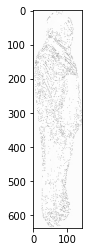

In [17]:
plt.imshow(image[0])

In [22]:
aug_iter = gen.flow(image_cv2)
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

In [32]:
import cv2
for i in range(len(aug_images)):
    cv2.imshow('result', aug_images[i])
    cv2.waitKey(0)


In [2]:
from utils.MaskRCNN import MaskRCNN
import cv2
from matplotlib import pyplot as plt

model = MaskRCNN()
frame_sample = cv2.imread('Datasets/Propio/Video/pasillo/cam_1/pasillo_001/pasillo_001 0001.jpg')
frame_copy = frame_sample.copy()
r, _ = model.segment(frame_sample)
mask = r['masks'][:, :, 0].astype('uint8')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


In [4]:
from utils.LocalBinaryPatterns import LocalBinaryPatterns
lbp = LocalBinaryPatterns(3)
lbp_frame = lbp.lbp(frame_copy).astype('uint8')

In [3]:
lbp_frame.shape, mask.shape

((2160, 3840), (2160, 3840))

In [5]:
from utils.ReID import crop_frame
x1, y1 = r["rois"][0][0], r["rois"][0][1]
x2, y2 = r["rois"][0][2], r["rois"][0][3]
bbox = crop_frame(x1, x2, y1, y2, frame_copy)
bbox_mask = crop_frame(x1, x2, y1, y2, mask)

In [7]:
from utils.ReID import apply_mask
masked_bbox = apply_mask(bbox, bbox_mask)

In [38]:
hist, bins = np.histogram(masked_bbox.ravel(), 24, [0, 24], density=True)
hist

array([0.6120742 , 0.02034882, 0.02838892, 0.02810267, 0.03970582,
       0.04699513, 0.03471654, 0.0312715 , 0.01905819, 0.02013539,
       0.02995827, 0.01935699, 0.01459621, 0.01112104, 0.00784675,
       0.00661889, 0.00459255, 0.00445193, 0.00402256, 0.00325923,
       0.00339231, 0.00301064, 0.00243563, 0.00453982])

In [ ]:
from processing import generate_masks_datasets

parent_root = 'Datasets/espe/base/validation'
target_root = 'Datasets/espe/masks/validation'

generate_masks_datasets(parent_root, target_root)